# Cylindrical Gravitational News by Stachel
##  Geoff Cope
##  Univeristy of Utah
##  December 22, 2021

Here we do calculations with metric 2.1 the Jordan Ehlers Kompaneets Metric

https://aip.scitation.org/doi/abs/10.1063/1.1705036

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,rho,phi,z,dt,drho,dphi,dz,psi,chi,gamma,rho = symbols( 't rho phi z dt drho dphi dz psi chi gamma rho' ) 

In [4]:
psi = Function('psi')(rho,t)
psi

In [5]:
chi = Function('chi')(rho,t)
chi

In [6]:
gamma = Function('gamma')(rho,t)
gamma

In [7]:
variables = Matrix( [t,rho,phi,z] )
variables

⎡t⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [8]:
differentials = Matrix( [dt,drho,dphi,dz] ) 
differentials

⎡ dt ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [13]:
lineElement = expand(exp(2*(gamma-psi))*( dt**2 - drho**2 )- exp(2*psi)*dz**2 - 2*chi*exp(2*psi)*dz*dphi - ( chi**2 * exp(2*psi) + rho**2 * exp(-2*psi) ) * dphi**2)
lineElement

In [14]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ 2⋅γ(ρ, t)  -2⋅ψ(ρ, t)                                                                     
⎢ℯ         ⋅ℯ                       0                               0                       
⎢                                                                                           
⎢                          2⋅γ(ρ, t)  -2⋅ψ(ρ, t)                                            
⎢          0             -ℯ         ⋅ℯ                              0                       
⎢                                                                                           
⎢                                                    2  -2⋅ψ(ρ, t)    2        2⋅ψ(ρ, t)    
⎢          0                        0             - ρ ⋅ℯ           - χ (ρ, t)⋅ℯ           -χ
⎢                                                                                           
⎢                                                                    2⋅ψ(ρ, t)              
⎣          0                        0                      -χ(ρ, t)⋅ℯ 

In [15]:
import sympy

In [16]:
m = sympy.Array(g)
m

⎡ 2⋅γ(ρ, t)  -2⋅ψ(ρ, t)                                                                     
⎢ℯ         ⋅ℯ                       0                               0                       
⎢                                                                                           
⎢                          2⋅γ(ρ, t)  -2⋅ψ(ρ, t)                                            
⎢          0             -ℯ         ⋅ℯ                              0                       
⎢                                                                                           
⎢                                                    2  -2⋅ψ(ρ, t)    2        2⋅ψ(ρ, t)    
⎢          0                        0             - ρ ⋅ℯ           - χ (ρ, t)⋅ℯ           -χ
⎢                                                                                           
⎢                                                                    2⋅ψ(ρ, t)              
⎣          0                        0                      -χ(ρ, t)⋅ℯ 

In [17]:
from einsteinpy.symbolic import *

In [18]:
syms = sympy.symbols("t rho phi z")
t,rho,phi,z = syms

In [19]:
metric = MetricTensor(m,syms)

In [21]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢⎡∂             ∂            ∂             ∂                                                
⎢⎢──(γ(ρ, t)) - ──(ψ(ρ, t))  ──(γ(ρ, t)) - ──(ψ(ρ, t))                                      
⎢⎢∂t            ∂t           ∂ρ            ∂ρ                                               
⎢⎢                                                                                          
⎢⎢∂             ∂            ∂             ∂                                                
⎢⎢──(γ(ρ, t)) - ──(ψ(ρ, t))  ──(γ(ρ, t)) - ──(ψ(ρ, t))                                      
⎢⎢∂ρ            ∂ρ           ∂t            ∂t                         

In [22]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                           
⎢                                                                               ∂           
⎢  2              2              2                           2     2            ──(γ(ρ, t)) 
⎢ ∂              ∂              ∂               ⎛∂          ⎞     ∂             ∂ρ          
⎢───(γ(ρ, t)) - ───(γ(ρ, t)) - ───(ψ(ρ, t)) - 2⋅⎜──(ψ(ρ, t))⎟  + ───(ψ(ρ, t)) + ─────────── 
⎢  2              2              2              ⎝∂t         ⎠      2                 ρ      
⎢∂ρ             ∂t             ∂ρ                                ∂t                         
⎢                                                                                           
⎢                                                                                           
⎢                                                         ∂              4⋅ψ(ρ, t) ∂        
⎢                                                         ──(γ(ρ, t)) 

In [23]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                               ∂           
⎢  2              2              2                           2     2            ──(γ(ρ, t)) 
⎢ ∂              ∂              ∂               ⎛∂          ⎞     ∂             ∂ρ          
⎢───(γ(ρ, t)) - ───(γ(ρ, t)) - ───(ψ(ρ, t)) - 2⋅⎜──(ψ(ρ, t))⎟  + ───(ψ(ρ, t)) + ─────────── 
⎢  2              2              2              ⎝∂t         ⎠      2                 ρ      
⎢∂ρ             ∂t             ∂ρ                                ∂t                         
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

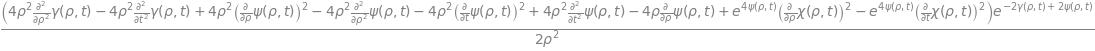

In [24]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [25]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [ ]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()